Welcome to Week 3!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles.


![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) through a python package for that - [upROOT](https://pypi.org/project/uproot/) and download some datafiles into your environment!.

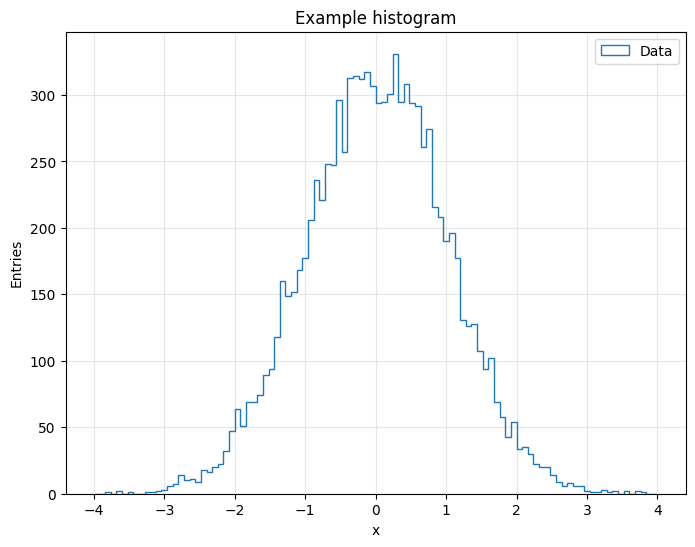

In [2]:
# We use NumPy for numerical work and random numbers
# Matplotlib is used for plotting as before
import numpy as np
import matplotlib.pyplot as plt

# SciPy provides fitting tools, similar to ROOT's Fit("gaus")
from scipy.stats import norm


# ------------------------------------------------------------
# 1. Generate Gaussian-distributed random numbers
#    (equivalent to h.FillRandom("gaus"))
# ------------------------------------------------------------

# Mean (mu) and standard deviation (sigma) of the Gaussian
mu = 0.0
sigma = 1.0

# Number of entries to generate (like number of fills)
n_entries = 10000

# Generate random data
data = np.random.normal(loc=mu, scale=sigma, size=n_entries)


# ------------------------------------------------------------
# 2. Create a histogram (We will do this alot today...))
# ------------------------------------------------------------

# Histogram settings - choose your own
n_bins = 100
x_min, x_max = -4, 4

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))


counts, bin_edges, _ = ax.hist(
    data,
    bins=n_bins,
    range=(x_min, x_max),
    histtype="step",
    label="Data"
)


# ------------------------------------------------------------
# 3. Labels, title, and final touches
# ------------------------------------------------------------

ax.set_title("Example histogram")
ax.set_xlabel("x")
ax.set_ylabel("Entries")

ax.legend()
ax.grid(alpha=0.3)

# Display the plot
plt.show()



All being well - this should give no errors and we should have some kind of Gaussian distribution above.

We now want to do two things, install uproot - and get our data file from the CERN open data storage location.

This will probably be ratelimited very quickly, so you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/26553/files/6101104?module_item_id=1009080

Then upload it directly.

In [3]:
!pip install uproot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.8/393.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.7/656.7 kB 40.1 MB/s eta 0:00:00


In [4]:
!mkdir LHCb_Data && cd LHCb_Data && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root

--2026-02-24 22:37:42--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666484974 (636M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetDown.root’

B2HHH_MagnetDown.ro 100%[===================>] 635.61M  32.3MB/s    in 21s     

2026-02-24 22:38:04 (30.8 MB/s) - ‘B2HHH_MagnetDown.root’ saved [666484974/666484974]



In [6]:
import uproot


# Open the ROOT file
file = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")

# List contents (shows us what is inside)
file.keys()

# Access the tree
tree = file["DecayTree"]

# Read one branch as a NumPy array
px = tree["H1_PX"].array(library="np")

px

array([  375.2842054 , -4985.13078543, -1265.45654435, ...,
        2606.91083928,  -294.71098895,   499.04234923])

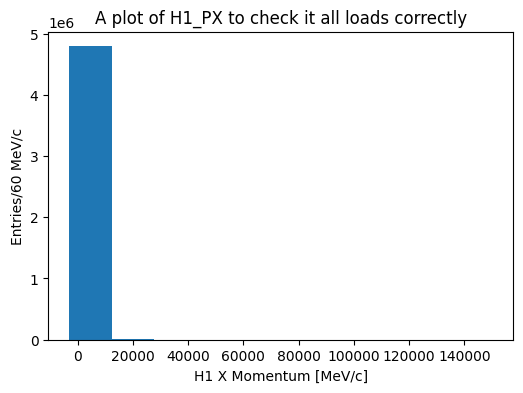

In [7]:
# now our data is an array - we can plot it :)

plt.figure(figsize=(6, 4))


#play with the variables below ...
plt.hist(
    px,
    bins=10,
    range=(-3000, 150000),
    histtype="bar"
)

#Add some labels...

plt.xlabel("H1 X Momentum [MeV/c]")
plt.ylabel("Entries/60 MeV/c")
plt.title("A plot of H1_PX to check it all loads correctly")

plt.show()

This is the point at which the setup is all working - you can proceed below if you want to look at a basic guide to fitting functions to data using numpy etc.

<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\s'
<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4170869882.py:45: SyntaxWarning: invalid escape sequence '\m'
  label=f"Gaussian fit\n$\mu={fit_mu:.3f}$, $\sigma={fit_sigma:.3f}$"
/tmp/ipython-input-4170869882.py:45: SyntaxWarning: invalid escape sequence '\s'
  label=f"Gaussian fit\n$\mu={fit_mu:.3f}$, $\sigma={fit_sigma:.3f}$"


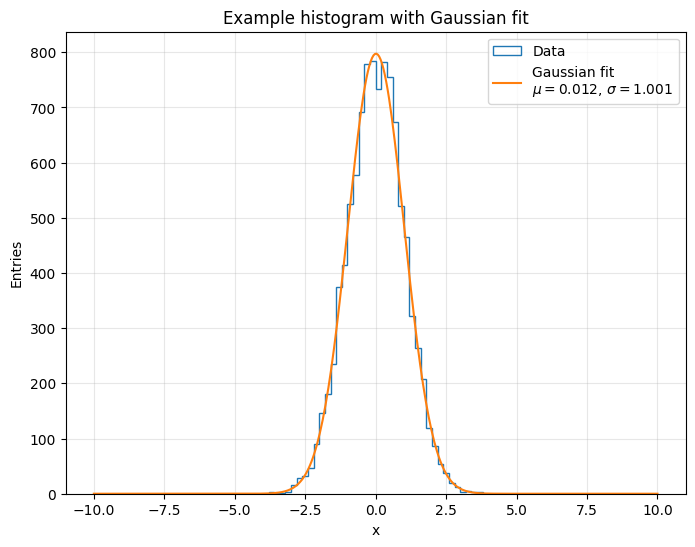

In [8]:
# Histogram settings - choose your own
n_bins =100
x_min=-10
x_max =10

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))


counts, bin_edges, _ = ax.hist(
    data,
    bins=n_bins,
    range=(x_min, x_max),
    histtype="step",
    label="Data"
)

# ------------------------------------------------------------
# Now we perform a Gaussian fit
# ------------------------------------------------------------

# Fit a normal distribution to the data
# norm.fit returns the fitted mean and standard deviation
fit_mu, fit_sigma = norm.fit(data)

# Create x values for drawing the fitted function
x = np.linspace(x_min, x_max, 400)

# Evaluate the fitted Gaussian probability density function
pdf = norm.pdf(x, fit_mu, fit_sigma)

# Convert PDF to expected histogram counts
# (ROOT does this internally; here we scale manually)
bin_width = (x_max - x_min) / n_bins
fit_y = pdf * n_entries * bin_width


# ------------------------------------------------------------
# Draw the fitted Gaussian on top of the histogram
# ------------------------------------------------------------

ax.plot(
    x,
    fit_y,
    label=f"Gaussian fit\n$\mu={fit_mu:.3f}$, $\sigma={fit_sigma:.3f}$"
)


# ------------------------------------------------------------
# abels, title, and final touches
# ------------------------------------------------------------

ax.set_title("Example histogram with Gaussian fit")
ax.set_xlabel("x")
ax.set_ylabel("Entries")

ax.legend()
ax.grid(alpha=0.3)

# Display the plot (equivalent to c.Draw())
plt.show()


## If you are **Here** - and Chris did not make the introduction yet - it's time for a coffee - take a break and wait for instructions about how to proceed.

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

In [9]:
#Using Uproot, load your data file and load the variables you think are useful for this analysis - I recommend learning what your data structure is...so plotting and calculations becomes easier later.
import uproot
import numpy as np
import matplotlib.pyplot as plt

file = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")
tree = file["DecayTree"]

px1 = tree["H1_PX"].array(library="np")
py1 = tree["H1_PY"].array(library="np")
pz1 = tree["H1_PZ"].array(library="np")

px2 = tree["H2_PX"].array(library="np")
py2 = tree["H2_PY"].array(library="np")
pz2 = tree["H2_PZ"].array(library="np")

px3 = tree["H3_PX"].array(library="np")
py3 = tree["H3_PY"].array(library="np")
pz3 = tree["H3_PZ"].array(library="np")

q1 = tree["H1_Charge"].array(library="np")
q2 = tree["H2_Charge"].array(library="np")
q3 = tree["H3_Charge"].array(library="np")





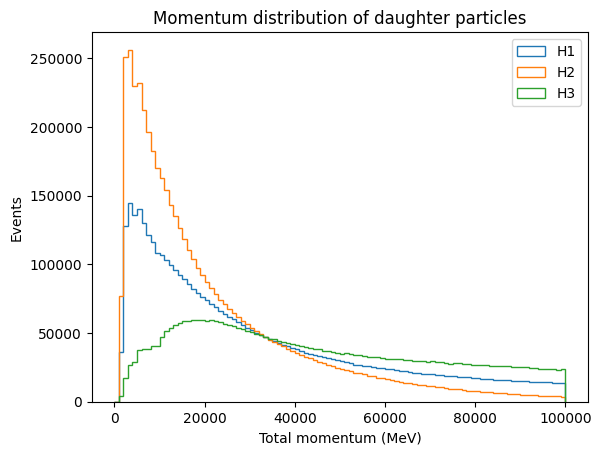

In [10]:
#Here make a plot of the Total momentum of each of the three daughters on one plot
p1 = np.sqrt(px1**2 + py1**2 + pz1**2)
p2= np.sqrt(px2**2 + py2**2 + pz2**2)
p3= np.sqrt(px3**2 + py3**2 + pz3**2)

plt.figure()

plt.hist(p1, bins=100, range=(0, 100000), histtype="step", label="H1")
plt.hist(p2, bins=100, range=(0, 100000), histtype="step", label="H2")
plt.hist(p3, bins=100, range=(0, 100000), histtype="step", label="H3")

plt.xlabel("Total momentum (MeV)")
plt.ylabel("Events")
plt.title("Momentum distribution of daughter particles")
plt.legend()

plt.show()

Now plot the total momentum for the mother (M_Ptot) this about how to calculate this from the information available

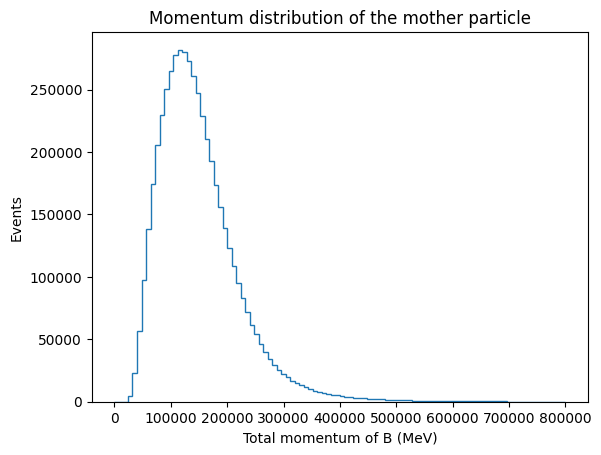

In [11]:
#use the histogram plotting tools, plot the momentum of the mother
#Calculate total momentum components of the mother (B meson)
px_B = px1 + px2 + px3
py_B = py1 + py2 + py3
pz_B = pz1 + pz2 + pz3

#Total momentum magnitude
p_B = np.sqrt(px_B**2 + py_B**2 + pz_B**2)

#Plot histogram
plt.figure()

plt.hist(p_B, bins=100, range=(0, 800000), histtype="step")

plt.xlabel("Total momentum of B (MeV)")
plt.ylabel("Events")
plt.title("Momentum distribution of the mother particle")

plt.show()

Let's take a look at the whole data file that is available to us by looking at one specific entry - for example the number 45th entry in your array...

In [12]:
# print the 45th entry from your array(s) together with the variable name, maybe in a nice list or table.
i = 44

print("Values for event 45:\n")

data = {
"H1_PX": px1[i],
"H1_PY": py1[i],
"H1_PZ": pz1[i],
"H2_PX": px2[i],
"H2_PY": py2[i],
"H2_PZ": pz2[i],
"H3_PX": px3[i],
"H3_PY": py3[i],
"H3_PZ": pz3[i],
"HB_PX": px_B[i],
"HB_PY": py_B[i],
"HB_PZ": pz_B[i],
}

for key, value in data.items():
   print(f"{key:12s} : {value}")

Values for event 45:

H1_PX        : -1634.778090943406
H1_PY        : 838.6625674548812
H1_PZ        : 15416.880380015971
H2_PX        : -3456.1594387288615
H2_PY        : -328.7925226754248
H2_PZ        : 21752.773751811932
H3_PX        : -2892.8286712088047
H3_PY        : -2105.6968313552316
H3_PZ        : 52930.48169790119
HB_PX        : -7983.766200881072
HB_PY        : -1595.826786575775
HB_PZ        : 90100.13582972909


We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

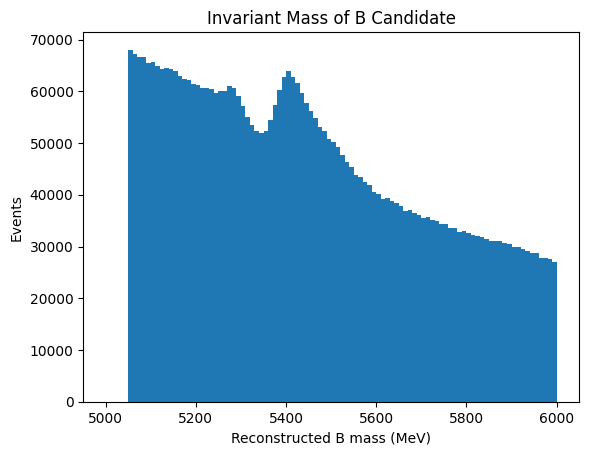

mass_B : 5300.27427576556


In [13]:
#First find the energy (you might have to do some physics thinking here)

# The using the total momentum find the reconstructed mass of the B

# Now write your new variables to an array

#Now plot a histogram of the range of masses of the B meson.

#Does this match what we would expect from theory?

#What are the features of your plot that you see?


import numpy as np
import matplotlib.pyplot as plt


# Now write your new variables to an array
#Assume kaon mass (MeV)
m = 493.677

# Calculate energies ----
E1 = np.sqrt(px1**2 + py1**2 + pz1**2 + m**2)
E2 = np.sqrt(px2**2 + py2**2 + pz2**2 + m**2)
E3 = np.sqrt(px3**2 + py3**2 + pz3**2 + m**2)

#First find the energy (you might have to do some physics thinking here)
# Total energy
E_total = E1 + E2 + E3

# The using the total momentum find the reconstructed mass of the B
#Reconstructed mass
mass_B = np.sqrt(E_total**2 - (px_B**2 + py_B**2 + pz_B**2))

#Plot histogram
plt.hist(mass_B, bins=100, range=[5000, 6000])
plt.xlabel("Reconstructed B mass (MeV)")
plt.ylabel("Events")
plt.title("Invariant Mass of B Candidate")
plt.show()

data={
"mass_B": mass_B[20]
}
for key, value in data.items():
   print(f"{key:1s} : {value}")

We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

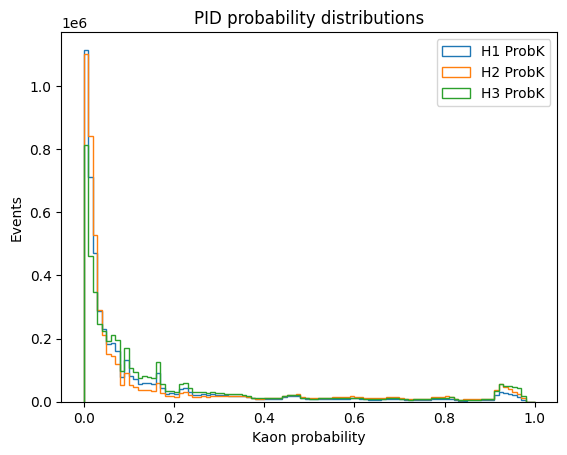

In [14]:
#Make plots of H1/H2/H3 _ProbK on one plot
probK1 = tree["H1_ProbK"].array(library="np")
probK2 = tree["H2_ProbK"].array(library="np")
probK3 = tree["H3_ProbK"].array(library="np")

plt.figure()

plt.hist(probK1, bins=100, range=(0,1), histtype="step", label="H1 ProbK")
plt.hist(probK2, bins=100, range=(0,1), histtype="step", label="H2 ProbK")
plt.hist(probK3, bins=100, range=(0,1), histtype="step", label="H3 ProbK")

plt.xlabel("Kaon probability")
plt.ylabel("Events")
plt.title("PID probability distributions")
plt.legend()

plt.show()


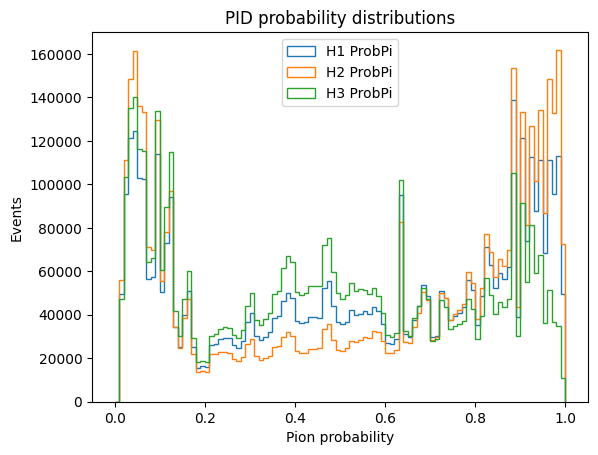

In [15]:
# Do the same for the Probability of being a Pion. Do these distributions match expectations?
probPi1 = tree["H1_ProbPi"].array(library="np")
probPi2 = tree["H2_ProbPi"].array(library="np")
probPi3 = tree["H3_ProbPi"].array(library="np")

plt.figure()

plt.hist(probPi1, bins=100, range=(0,1), histtype="step", label="H1 ProbPi")
plt.hist(probPi2, bins=100, range=(0,1), histtype="step", label="H2 ProbPi")
plt.hist(probPi3, bins=100, range=(0,1), histtype="step", label="H3 ProbPi")

plt.xlabel("Pion probability")
plt.ylabel("Events")
plt.title("PID probability distributions")
plt.legend()

plt.show()


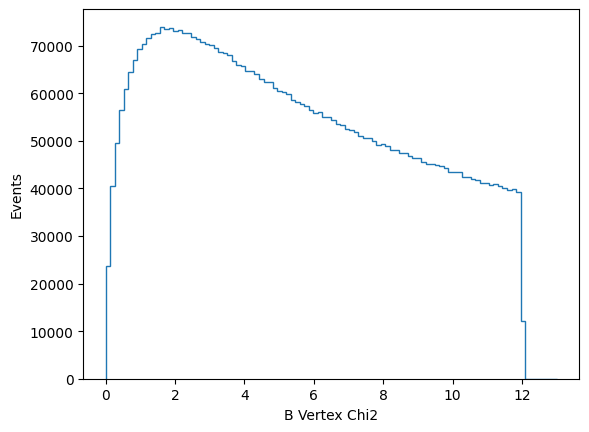

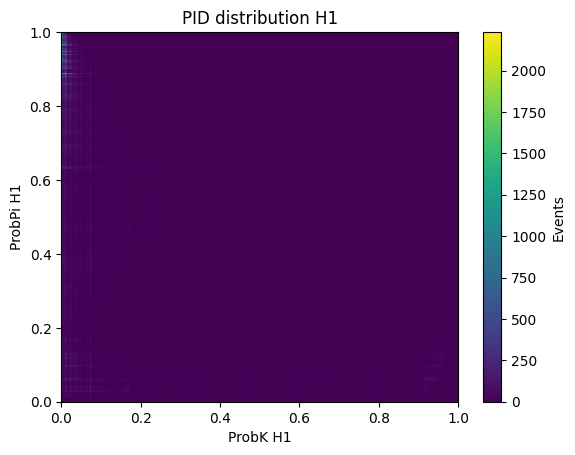

In [16]:
#For all our particles, make a plot of the B_VertexChi2

import matplotlib.pyplot as plt

chi2 = tree["B_VertexChi2"].array(library="np")

plt.hist(chi2, bins=100, range=(0,13), histtype="step")
plt.xlabel("B Vertex Chi2")
plt.ylabel("Events")
plt.show()



#Feeling ambitious? Maybe make a 2d plot of Kaon and Pion Prob in a 2 dimensional analysis?
plt.figure()
plt.hist2d(probK1, probPi1, bins=1000, range=[[0,1],[0,1]])
plt.xlabel("ProbK H1")
plt.ylabel("ProbPi H1")
plt.title("PID distribution H1")
plt.colorbar(label="Events")
plt.show()


Using these plots, we can now make a preselection string. This is a text string that looks like

In [17]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon
#This is not a good choice of selection - you should make your own :)
selection=("H1_ProbPi>0.9&H2_ProbPi>0.9&H3_ProbPi>0.9&!H1_isMuon&H2_isElectron&H3_isElephant")

selection = (
"H1_ProbK>0.6 & "
"H2_ProbK>0.6 & "
"H3_ProbK>0.6 & "
"!H1_isMuon & "
"!H2_isMuon & "
"!H3_isMuon & "
"B_VertexChi2<10"
)

In [ ]:
#Look at the total number of entries originally and the new number - how much of your data did you throw away? Was this a good idea? :(

In [ ]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)
#What do you notice about your histogram now?


In [ ]:
#You can also plot your selected data alone - this shape probably looks quite alot different to your first distribution!

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.1 MB/s eta 0:00:00
[[Model]]
    (Model(gaussian, prefix='g_') + Model(exponential, prefix='e_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 367
    # data points      = 100
    # variables        = 5
    chi-square         = 2.2951e+11
    reduced chi-square = 2.4159e+09
    Akaike info crit   = 2165.40504
    Bayesian info crit = 2178.43089
    R-squared          = -4.75770709
##  Warning: uncertainties could not be estimated:
    g_sigma:      at boundary
    e_amplitude:  at initial value
    e_decay:      at initial value
[[Variables]]
    g_amplitude:  12814418.8 (init = 1000)
    g_center:     5401.87692 (init = 5410)
    g_sigma:      49.9999778 (init = 20)
    e_amplitude:  1000.00000 (init = 1000)
    e_decay:      1.0000e-03 (init = 0.001)
    g_fwhm:       117.740948 == '2.3548200*g_sigma'
    g_height:   

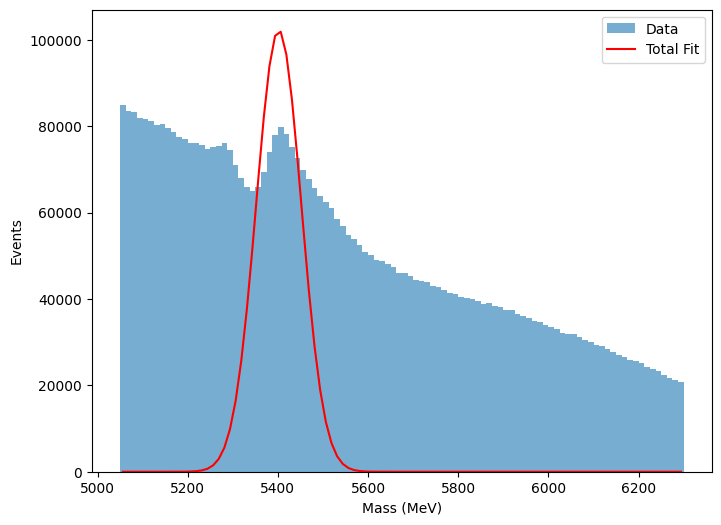

In [18]:
# Probably handy to use a package like lmfit to help us with the models we might want to use, then use scipy to fit



# check out its documentation for what shapes it can handle for you! https://pypi.org/project/lmfit/

# it can do the whole fitting story and output results too :)


!pip install lmfit
from lmfit.models import GaussianModel, ExponentialModel

gauss = GaussianModel(prefix='g_')
expo = ExponentialModel(prefix='e_')

model = gauss + expo
params = model.make_params()

counts, bin_edges = np.histogram(mass_B, bins=100)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

params['g_amplitude'].set(value=1000, min=0)
params['g_center'].set(value=5410, min=5350, max=5470)
params['g_sigma'].set(value=20, min=1, max=50)

params['e_amplitude'].set(value=1000, min=0)

#Set e_decay to a positive value for a decaying exponential background
#A typical range could be from 0.0001 to 1.0, depending on the data shape.
#Using a small positive value to start, as a very small negative value caused overflow.
params['e_decay'].set(value=0.001, min=0.00001, max=100.0)

# Adjusted initial value and bounds

result = model.fit(counts, params, x=bin_centers)

print(result.fit_report())


plt.figure(figsize=(8,6))
plt.hist(mass_B, bins=100, alpha=0.6, label="Data")
plt.plot(bin_centers, result.best_fit, 'r-', label="Total Fit")
plt.legend()
plt.xlabel("Mass (MeV)")
plt.ylabel("Events")
plt.show()





In [ ]:
#use my example of creating a PDF (far far) above to do a fit to your data. Start with one component, think about making a number 2 component plot - so we have a part for the background and a part for the signal.

# if your cut is very strict above, you may actually get better results by being less strict, give yourself more data and more events to run through the fitting procedure.

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

You can use the signal shape, the bin widths and the quad from scipy.integrate function to "count" how many events lie under your signal peak,  not including the background events - this is what we actually want.

It will also return to you an error - check in the scipy documentation about what that actually means....

#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [19]:
#Here do your calculation of the final result
import numpy as np

# Get charges
q1 = tree["H1_Charge"].array(library="np")
q2 = tree["H2_Charge"].array(library="np")
q3 = tree["H3_Charge"].array(library="np")

# Count positive charges
n_positive = (q1 > 0).astype(int) + (q2 > 0).astype(int) + (q3 > 0).astype(int)

# Define masks
Bplus_mask  = (n_positive == 2)
Bminus_mask = (n_positive == 1)

# Remove invalid events
valid_mask = Bplus_mask | Bminus_mask

# Apply mask to mass array
mass_valid = mass_B[valid_mask]
mass_Bplus = mass_B[Bplus_mask]
mass_Bminus = mass_B[Bminus_mask]

counts_p, bins_p = np.histogram(mass_Bplus, bins=100, range=(4.9,5.6))
centers_p = 0.5 * (bins_p[1:] + bins_p[:-1])

result_p = model.fit(counts_p, params, x=centers_p)

NB_plus = result_p.params['g_amplitude'].value

counts_m, bins_m = np.histogram(mass_Bminus, bins=100, range=(4.9,5.6))
centers_m = 0.5 * (bins_m[1:] + bins_m[:-1])

result_m = model.fit(counts_m, params, x=centers_m)

NB_minus = result_m.params['g_amplitude'].value

A = (NB_minus - NB_plus) / (NB_minus + NB_plus)

sigma_A = np.sqrt((1 - A**2) / (NB_minus + NB_plus))

print("NB+ =", NB_plus)
print("NB- =", NB_minus)
print("Asymmetry A =", A)
print("Uncertainty σ_A =", sigma_A)

NB+ = 1000.0000000000001
NB- = 1000.0000000000001
Asymmetry A = 0.0
Uncertainty σ_A = 0.022360679774997894


#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your scatter

We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

In [ ]:
#Make the revised Dalitz plot here for B+ mesons

In [ ]:
#Make the revised Dalitz plot here for B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)